# Team OT

How do you quantify the *best* neighborhood? There are so many factors to choose from; it isn't a cut and dry process. In order to manage such a large problem, we simplified the *best* neighborhood into 3 metrics. These metrics are crime rate, number of public facilities, and number of parking meters for each respective neighborhood. Crime rate is a fairly simple one. The lower a neighborhood's crime rate, the safer and more secure it is. Next, we chose to look at public facilities. These include fire stations, police stations, parks, schools, etc. A higher number of public facilities would indicate more schools (higher education), more police/fire stations (safer), and more parks/rec facilities (more fun :D). I also chose to factor in the population per neighborhood for the public facilities dataset and merge them together to create a score for each neighborhood. Neighborhoods with a lower population would naturally have less public facilities, so not including population wouldn't be a fair metric. Finally, we chose to look at the number of parking meters in each neighborhood. Parking is essential for a neighborhood you want to call home. We had other metrics we wanted to look at too, but thery di

## Crime Rate

## Introduction

I chose the crime rate of each neighborhood as my metric because I believe safety is of paramount importance to individuals and families alike. In order to deem a neighborhood good, I believe that the residents of said neighborhood must feel safe and protected in their homes and on the street. Higher crime rates within a community have been shown to have negative health effects on the members of that community. For example, people who fear their neighborhood is high in crime will less likely choose to partake in physical activity that could potentially put them in harm's way. Also, trauma related to witnessing crime, especially in children, is obviously much higher in high-crime neighborhoods, which can have lasting effects throughout a person's life. Overall, a high-crime neighborhood brings a host of mental, physical, and, psychological problems that are not present within the confines of a low-crime neighborhood. 

### Part One

In this section, I imported all my necessary tools required throughout my part of the project. I then input the .csv file and read it in using the "neighborhood" column as the index column. Also, I had to filter out a lot of the columns in order to get the relevant data in an orderly chart that was easily readable. Then, I sorted the "overall_crime_rates" values from least to greatest, as the lowest crime rate is desirable, compared to the highest. I used geopandas to read the map file into the notebook and finally changed a few names of neighborhoods that were listed slightly different than those on the map. 

In [26]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas



crime_rate_csv = "arrests-for-major-crimes.csv"
data = pd.read_csv(crime_rate_csv, index_col = "neighborhood")

data = data.filter(['population','overall_crime_rate' ])
data.sort_values(by = "overall_crime_rate", ascending = True)


neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

data.rename(index = {'Lawrenceville':'Central Lawrenceville', 'Crafton Heights - Westwood - Oakwood':'Crafton Heights',
                     'Hazelwood-Glenwood-Glen Hazel' : 'Hazelwood', 'Lower Oakland' : 'South Oakland', 'Mount Washington - Duquesne Heights' :
                     'Mount Washington', 'Ridgemont - Chicken Hill' : 'Ridgemont', 'Sheraton Chartiers' : 'Sheradon', 
                     'Southside Flats' : 'South Side Flats', 'Southside Slopes' : 'South Side Slopes', 'Spring Hill' :
                     'Spring Hill-City View', 'The Strip' : 'Strip District', '31st Ward':'Hays', 'West End Valley' : 'West End',
                     'Squirrel Hill - North of Forbes' : 'Squirrel Hill North', 'Squirrel Hill - South of Forbes' : 
                     'Squirrel Hill South', 'The Bluff' : 'Bluff', 'Harpen Hilltop' : 'Summer Hill',
                     'California Ave.' : 'California-Kirkbride', 'Shadeland Halls Grove' : 'Marshall-Shadeland',
                     'North View Heights' : 'Northview Heights', 'Central North Side':'Central Northside',
                     'East North Side' : 'East Allegheny','Elliot' : 'Elliott','Sheraton Chartiers':'Sheraden'}, inplace = True)

### Part Two

In this section, I grouped the data by nieghborhood and retrieved the crime rate for each. Then, I sorted the 20 lowest values from least to greatest and graphed them on a bar graph. Finally, I printed the data in a simple chart in order to read the graph better. The bar graph shows how small the margin of difference is in many neighborhoods; this shows there could be an argument made for multiple neighborhoods, as the top 20 are all within a 1.51 difference of each other. 

neighborhood
Harpen Hilltop                          0.99
Crafton Heights - Westwood - Oakwood    1.41
Morningside                             1.61
Brighton Heights                        1.64
Elliot                                  1.70
Swisshelm Park                          1.72
Troy Hill                               1.78
Shadeland Halls Grove                   1.79
Upper Lawrenceville                     1.80
Southside Slopes                        1.82
East Carnegie                           1.82
Perry North                             1.84
Brookline                               1.91
Banksville                              1.94
Sheraton Chartiers                      1.96
Carrick                                 1.98
Beechview                               1.98
31st Ward                               2.03
Greenfield                              2.38
Arlington                               2.50
Name: overall_crime_rate, dtype: float64


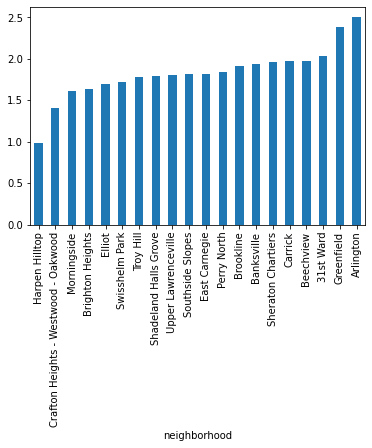

In [7]:
data2 = data.groupby("neighborhood").sum()["overall_crime_rate"]
data2.sort_values(ascending = True).head(20).plot(kind = "bar")
print(data2.sort_values(ascending = True).head(20))

#### Part Three

Here, I created a map using the entirety of the csv file; some neighborhoods were did not have any data to graph. The map is useful to see crime-concentrated areas, and see how crime rates are around the entirety of Pittsburgh and its surrounding neighborhoods. Also, you can see how similarly low the crime rate is in many neighborhoods, so the small margins between neighborhood crime rates are displayed well in a map. 

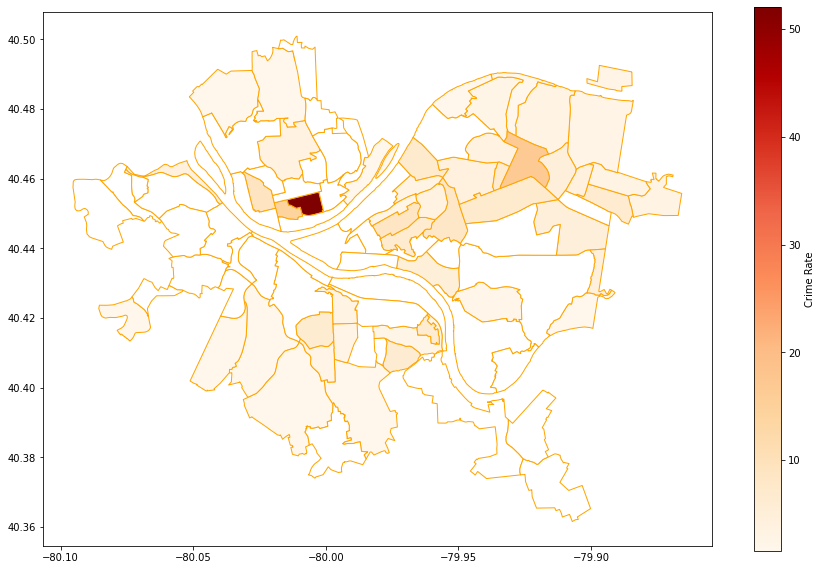

In [27]:
crime_rate_map = neighborhoods.merge(data2, how = 'left', left_on = 'hood', right_on = 'neighborhood')
crime_rate_map.plot(column = 'overall_crime_rate', cmap = 'OrRd', edgecolor = "orange", legend = True,
                   legend_kwds={'label': "Crime Rate"}, figsize = (15,10), missing_kwds = {"color": "white"})

## Conclusion

According to the data I retrieved, sorted through, and displayed, Summer Hill is the best neighborhood according to my metric. Its crime rate of .99 beat out the second-lowest neighborhood, Crafton Heights, by .42. Even though the data is in favor of Summer Hill, I think an argument couldbe made for any of the top 18 neighborhoods. They were all within an extremely close margin of one another and the crime rate is below 2, which is low among any standard. The highest-crime neighborhood with available data was Allegheny Center, with a rate of 52.04; however, this data could be skewed considering it is located near downtown Pittsburgh and also has a very low population, since most of the county is home to commercial buildings. 

# Public Facilities

## Introduction

What makes a neighborhood *the best*? Is it aggregate income, the safety of the neighborhood, or overall quality of life? Personally, I believe it is a large combination of factors which make a neighborhood *the best*. The search for adequate metrics to rank neighborhoods wasn't all too hard. To start, we thought it necessary to include the safety of a neighborhood, because nobody wants to feel unsafe in their own home. This was why we chose to look at the overall crime rate of Pittsburgh neighborhoods. A lower crime rate indicates a safer environment for family and individual life. Crime rate isn't the only factor of *the best* neighborhood, however. Next, we chose to look at the number of parking meters per neighborhood. Everyone wants a place to park when they start to live somewhere. Areas with a significantly lower amount of parking meters will make a more difficult and frustrating life. Finally, I chose to research the public facilities in Pittsburgh neighborhoods. By public facilities, I mean buildings such as fire stations, police stations, schools, libraries, parks, etc. I believe this encompasses multiple important factors in the quality of a neighborhood; such as happiness/quality of life from parks and recreational facilities, to safety and security from fire stations and police stations. 

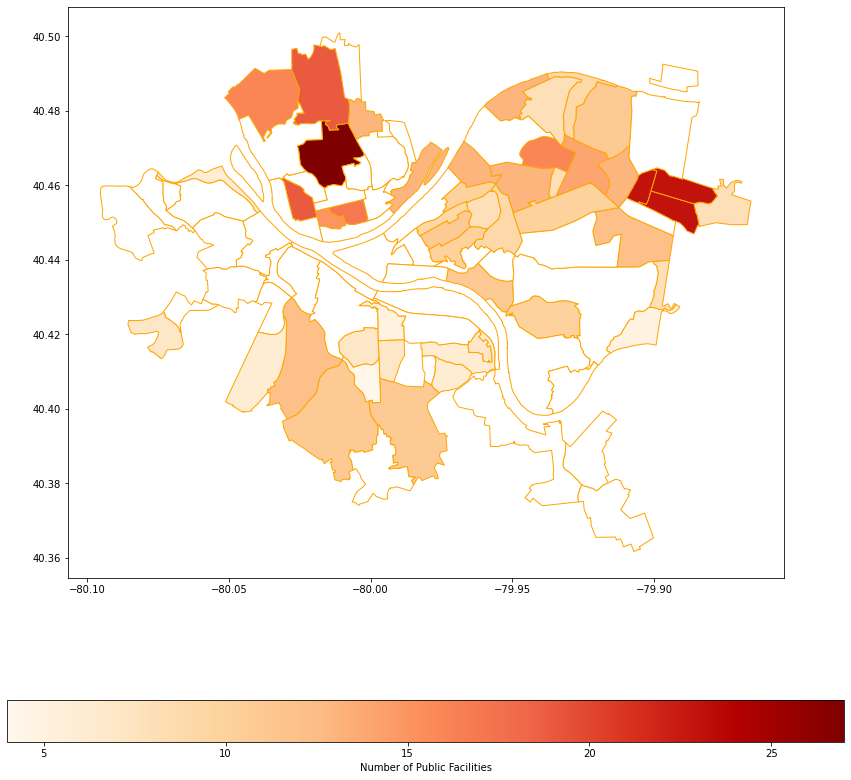

In [13]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# reading public facilities csv file into dataframe
public_facilities_csv = "Public_Facilities.csv"
public_facilities = pd.read_csv("Public_Facilities.csv") 

# renaming column "neighborhood" to "Neighborhood" to help with data merging later on
public_facilities = public_facilities.rename(columns = {'neighborhood': 'Neighborhood'})

# removing unnecessary columns
del public_facilities['facility name']
del public_facilities['facility subtype']

# creating a frequency counter to count # of facilities per neighborhood
public_facilities['Frequency'] = public_facilities.groupby('Neighborhood')['Neighborhood'].transform('count')

# dropping the dupes to keep data clean
public_facilities = public_facilities.drop_duplicates('Neighborhood', keep='last')

# sorting by frequency
public_facilities = public_facilities.sort_values(by=['Frequency'], ascending=False)

public_facilities.rename(columns = {'Lawrenceville':'Central Lawrenceville', 'Crafton Heights - Westwood - Oakwood':'Crafton Heights',
                     'Hazelwood-Glenwood-Glen Hazel' : 'Hazelwood', 'Lower Oakland' : 'South Oakland', 'Mount Washington - Duquesne Heights' :
                     'Mount Washington', 'Ridgemont - Chicken Hill' : 'Ridgemont', 'Sheraton Chartiers' : 'Sheradon',
                     'Southside Flats' : 'South Side Flats', 'Southside Slopes' : 'South Side Slopes', 'Spring Hill' :
                     'Spring Hill-City View', 'The Strip' : 'Strip District', '31st Ward':'Hays', 'West End Valley' : 'West End',
                     'Squirrel Hill - North of Forbes' : 'Squirrel Hill North', 'Squirrel Hill - South of Forbes' :
                     'Squirrel Hill South', 'The Bluff' : 'Bluff', 'Harpen Hilltop' : 'Summer Hill',
                     'California Ave.' : 'California-Kirkbride', 'Shadeland Halls Grove' : 'Marshall-Shadeland',
                     'North View Heights' : 'Northview Heights', 'Central North Side':'Central Northside',
                     'East North Side' : 'East Allegheny','Elliot' : 'Elliott','Sheraton Chartiers':'Sheraden'}, inplace = True)

# Mapping frequency of public facilities
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
facilities_map = neighborhoods.merge(public_facilities, how='left', left_on='hood', right_on='Neighborhood')
facilities_map.plot(column = 'Frequency', cmap = 'OrRd', edgecolor = "orange", legend = True, 
                    legend_kwds = {'label': "Number of Public Facilities", 'orientation': "horizontal" }, figsize = (15,15), missing_kwds = {"color": "white"})

# Findings?

In [3]:
public_facilities.head(5)

,Neighborhood,Frequency
585,Perry South,27
373,Homewood South,23
396,Homewood West,23
350,Homewood North,23
181,Central North Side,21


As you can see, I have ranked the top 5 neighborhoods based on the number of public facilites they have. Perry South should take the cake as #1 best neighborhood, all according to my data. Right?

## The Issue

Normally, this way of quantifying the quality of a neighborhood would work just fine, *if* all neighborhoods were the same population. Unfortunately, this is the real world, and not every neighborhood has the same number of people. If a neighborhood has a very low population, it only makes sense that they would have less public facilities. Ranking neighborhoods solely by the number of public facilities would be unfair to communities with a lower population. To solve this issue, I gathered the population of every neighborhood in Pittsburgh, and merged it with my rankings.

In [15]:
# reading population csv into dataframe
population_density_csv = "population-density.csv"
population = pd.read_csv("population-density.csv", index_col = "Neighborhood")

# removing unnecessary columns
population = population.filter(['Neighborhood', 'Pop. 2010'])

In [16]:
# merging both dataframes into one with all required data
final = pd.merge(public_facilities, population, on = "Neighborhood")

# removing commas from the population numbers to allow conversion from string to int
final = final.replace(',','', regex=True)

Now I have a new dataframe with the neighborhood name, number of public facilites, and the population. I can use this dataframe to give each neighborhood a "score." In essence, what I am doing is simply dividing the frequency (# of public facilities) by the population. I then multiplied the score by 100 to give a more easily readable score value.

Text(0, 0.5, 'Score')

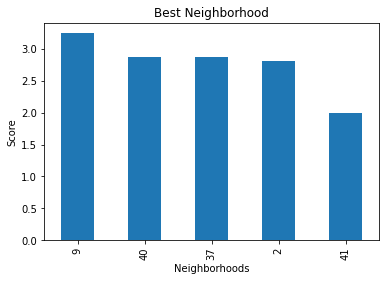

In [17]:
# transforming strings to ints to allow division between columns
final['Pop. 2010'] = final['Pop. 2010'].astype(int)

# dividing
final["Score"] = (final["Frequency"]/final["Pop. 2010"]) * 100

# sorting final dataframe by score
final = final.sort_values(by=['Score'], ascending=False)

# plotting final dataframe
final.groupby("Neighborhood")
final["Score"].head(5).plot(kind = "bar")
plt.title("Best Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Score")

In [19]:
final.head(10)

,Neighborhood,Frequency,Pop. 2010,Score
9,Allegheny West,15,462,3.246753
40,St. Clair,6,209,2.870813
37,Arlington Heights,7,244,2.868852
2,Homewood West,23,818,2.811736
41,Esplen,6,301,1.993355
6,Allegheny Center,17,933,1.822079
38,East Carnegie,7,570,1.228070
13,Northview Heights,13,1214,1.070840
1,Homewood South,23,2344,0.981229
5,Manchester,19,2130,0.892019


# Conclusion

As you can see, there is a fairly large disparity between the scores of the top 5 neighborhoods. You may also notice that the top 5 neighborhoods all have less than 1,000 population. Allegheny West takes the number one spot with a score of 3.2. This is because there is a total of 15 public facilities, but only a measly population of 462. Coming in second place is St. Clair, with less public facilities and less population than Allegheny West. In third place is Arlington Heights. The facility count and population is incredibly similar to St. Clair, only getting beaten by 0.01 score. Some other honorable mentions would be Perry South, which has the highest number of public facilities. However, with a much greater population of 4,145 people, the ratio of facilities to people is much lower, ranking it lower on the list. From this data, we can conclude that Allegheny West is one of the most safe, happy, and healthy neighborhoods in Pittsburgh.

# Parking Meters

## Introduction

I chose the Parking Meters of each neighborhood as my metric because I believe that having easy access to park your prefered method of motorized transportation is an important factor in determining the best neighborhood to live in Pittsburgh. A higher number of active parking meters will allow more on the road parking, which is important if you choose to live in a building without parking. Additionally, parking meters often times allow for less traffic on roads. 

### Part One

In this section, I imported all of my necessary libraries required throughout my metric analysis. Then i input the CSV file and converted it to a DataFrame for easier data accessibility. I also renamed the column names and I replaced the mis-spelled neighborhood names.

In [20]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import csv
import seaborn as sns


parkingmeter_csv = pd.read_csv("ParkingMetersPittsburghParkingAuthority.csv")
data = pd.DataFrame(parkingmeter_csv)
data = data.rename(columns = {'node': 'Neighborhood','terminal_2': 'Status', 'rates': 'Price'})
data = data.replace({'Lawrenceville':'Central Lawrenceville', 'ShadySide' : 'Shadyside', 'Squirell Hill' : 'Squirrel Hill North',
                                   'Oakland' : 'Central Oakland', 'South Side' : 'South Side Slopes', 'NorthSide': 'Troy Hill','Mt. Washingt*': 'Mount Washington', 'Strip Distri*' : 'Strip District', 'Oakland' : 'North Oakland'})
data = data.filter(['Neighborhood','Status', 'Price'])


### Part Two

In this section, I calculated the Frequency of parking meters in each neighborhood. Then after removing the duplicate rows, I sorted the values by Frequency from Greates to Least. Then I printed the top 15 results.

In [21]:
data['Frequency'] = data.groupby('Neighborhood')['Neighborhood'].transform('count')  
data = data.drop_duplicates('Neighborhood')
data = data.sort_values(by = ['Frequency'], ascending = False)


data.head(10)

,Neighborhood,Status,Price,Frequency
28,North Oakland,Active,$3.00,216
35,South Side Slopes,Active,$1.00,109
57,Downtown,Active,$4.00,104
53,Troy Hill,Active,$1.00,84
10,Squirrel Hill North,Active,$1.50,69
23,Shadyside,Active,$1.50,66
30,Bloomfield,Active,$1.00,61
152,Uptown,Active,$1.50,60
0,East Liberty,Active,$1.50,59
207,Strip District,Active,$1.50,50


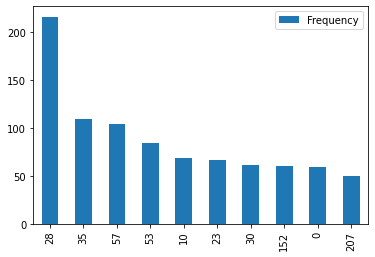

In [22]:
data.head(10).plot(kind = 'bar')


### Part Three

Here, I create a map using the entirety of the csv file, but some neighborhoods did not have any data to be graphed. The map is useful to visualize in which neighborhoods most of the active parking meters are available. I used geopandas to read the map file into the notebook.

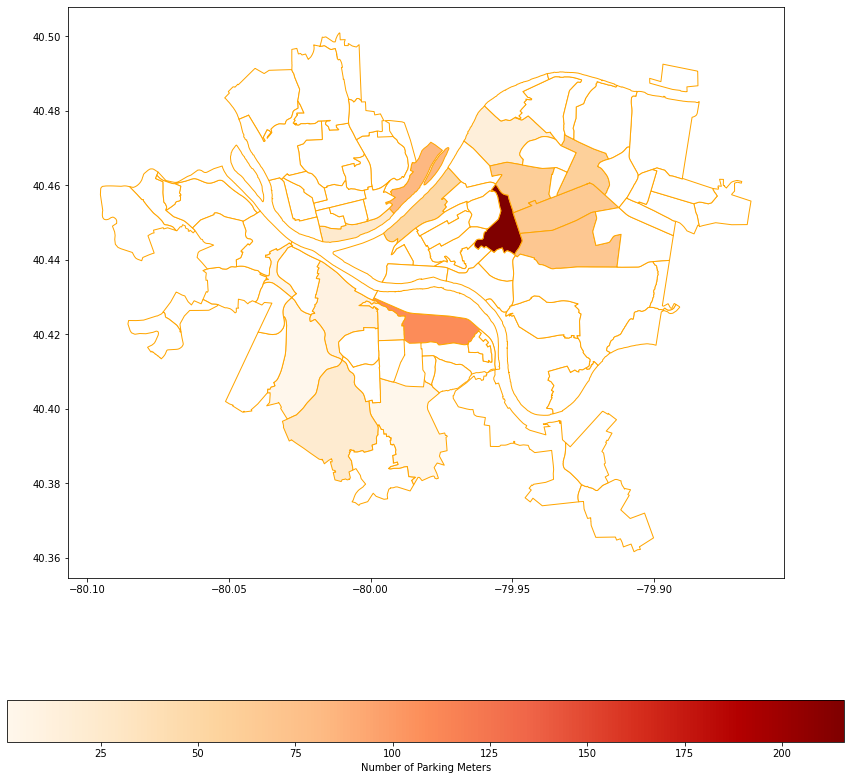

In [23]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
meter_map = neighborhoods.merge(data, how='left', left_on='hood', right_on='Neighborhood')
meter_map.plot(column = 'Frequency', cmap = 'OrRd', edgecolor = "orange", legend = True, 
                    legend_kwds = {'label': "Number of Parking Meters", 'orientation': "horizontal" }, figsize = (15,15), missing_kwds = {"color": "white"})


# Conclusion

As you can see, there is a fairly large disparity between the number of parking meters availible across the top 5 neighborhoods. According to the data I used, North Oakland is the best neighborhood for my metric. There are 216 active parking meters in North Oakland. However, I think it could be argued that any of the top 10 neighborhoods are good for parking meters, because they range from 50 to 100 active meters. North Oakland has a lot more, as it has many public hospital buildings with UPMC and public institution buildings with the University of Pittsburgh.  

# Final Conclusion

## Crime Rate Top 5 - Weight of 10
1. Summer Hill X 10 = 50
2. Crafton Heights X 10 = 40
3. Morningside X 10 = 30
4. Brighton Heights X 10 = 20
5. Elliott X 10 = 10

## Public Facilities Top 5 - Weight of 5
1. Allegheny West x 5 = 25
2. St. Clair x 5 = 20
3. Arlington Heights x 5 = 15
4. Homewood West x 5 = 10
5. Esplen x 5 = 5

## Parking Meters Top 5 - Weight of 3
1. North Oakland x 3 = 15
2. Southside Slopes x 3 = 12
3. Downtown x 3 = 9
4. Troy Hill x 3 = 6
5. Squirrel Hill North x 3 = 3

Now that all of our data is compiled and analyzed, it is time to determine the best neighborhood in Pittsburgh. For our metrics, we decided that crime rate was the most important, followed by public facilities, and finally parking meters. In order to gauge the importance correctly, we gave each metric a "weight." We decided to give crime rate a weight of 10, public facilities a weight of 5, and parking meters a weight of 3. To us, crime rate is the most important metric. You can survive in a neighborhood without public facilities or parking, but if the crime rate is high, your safety and security is in jeopardy. We ranked public facilities lower than crime rate because as aforementioned, you can survive without public facilities (for the most part). It may not be as pleasant or fun of a neighborhood, but safety is number one priority. Finally, we ranked parking meters and the bottom of our metric pyramid because while public parking is important, not every parking spot has a parking meter. Parking still could be available in neighborhoods with a low number of parking meters. After we decided our metric weights,we took the ranking number and multiplied it by said weight. For example, North Oakland bagged the number one spot in parking meters. Since the parking meter metric has a weight of 3, we multiplied 1 x 3 to give North Oakland a "score" of 3. This was done for the top 5 in each metric, since they are the only imporant values currently. We then chose the neighborhood with the lowest score (golf rules!) to be declared as the winner of our best neighborhood challenge. After the math was concluded, we found that Summer Hill was the best neighborhood in Pittsburgh, by our metrics. 